In [1]:
# Mateusz Biegański
# mb385162

# SAD 2020-2021 MIMUW

In [2]:
# pretty print string formatting.
library("glue");

# 'reduce' operator.
# devtools::install_github("tidyverse/purrr")
library("purrr")

# useful stuff for plotting multiple histograms. 
library("tidyr")

# easy and beaufiful plots.
library("ggplot2")

# %>% operator.
library("dplyr")


Attaching package: ‘dplyr’


The following object is masked from ‘package:glue’:

    collapse


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
# Helper functions.

m  = function(x) print(methods(class=class(x)))
p  = function(x) print(glue(x, .envir=environment()))
ph = function(x) print(head(x))
pt = function(x) print(tail(x))
pc = function(x) print(class(x))
id = function(x) x


In [4]:
# Read the data.
DATA_FNAME = "people.tsv"

df <- read.table(DATA_FNAME, header = TRUE,  sep = '\t',  stringsAsFactors = FALSE)
# df[which(df$pet == "none"),]$pet = NA

In [5]:
p("Number of observations: {nrow(df)}")

Number of observations: 500


In [6]:
head(df)

quantitive = c("age", "weight", "height", "number_of_kids", "expenses")
categorical = c("gender", "married", "pet")

p("Quantitive variables: {reduce(quantitive, paste, sep=', ')}")
p("Categorical variables: {reduce(categorical, paste, sep=', ')}")

,age,weight,height,gender,married,number_of_kids,pet,expenses
,<int>,<dbl>,<dbl>,<chr>,<lgl>,<int>,<chr>,<dbl>
1,25,61.7,121.12,other,FALSE,2,ferret,23.44299
2,37,63.9,145.00,man,TRUE,6,dog,96.83683
3,41,50.2,145.03,woman,TRUE,2,hedgehog,312.67693
4,43,72.4,179.90,man,FALSE,1,dog,447.42838
5,26,78.4,163.91,man,FALSE,1,hedgehog,-78.22799
6,49,59.4,151.86,woman,TRUE,2,ferret,1241.98263


Quantitive variables: age, weight, height, number_of_kids, expenses
Categorical variables: gender, married, pet


In [7]:
# TODO comment.
unique(df$pet)
unique(df$number_of_kids)

[1] "ferret"   "dog"      "hedgehog" "none"     "cat"

[1] 2 6 1 0 5 3 4

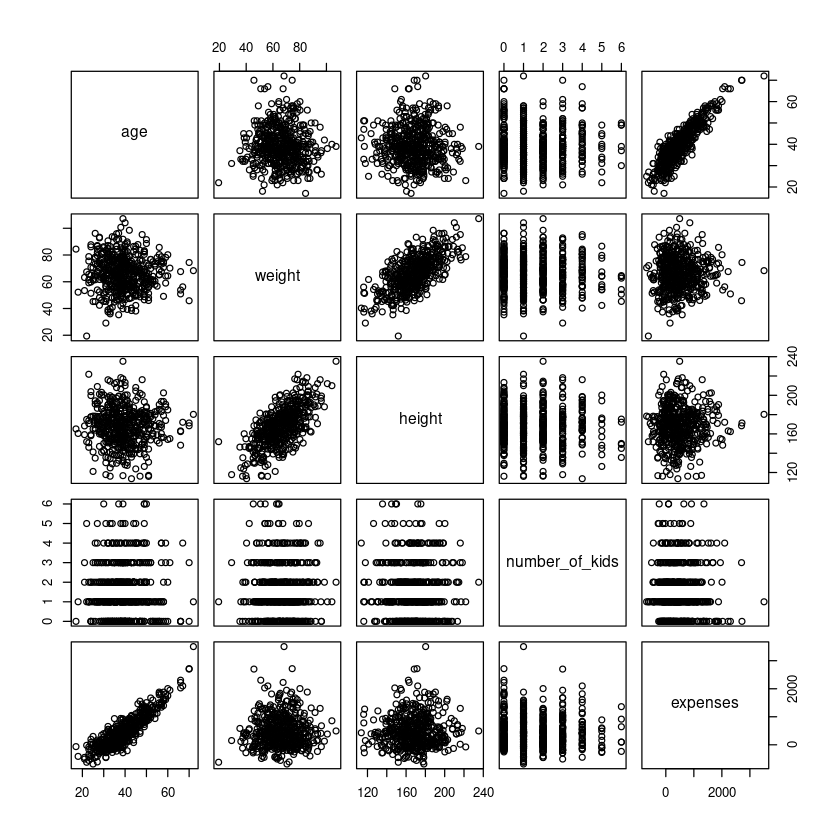

In [8]:
# Let's investigate variables correlaction.
pairs(df[quantitive])

As we can see, _height_ is positively correlated with _weight_, as well as _age_ is positively correlated with _expenses_. The second case is not harmful for our estimation, because _expenses_ is response variable - we can expect our regression model to have significant _age_ coefficient. 

For categorical variables dependencies check, 

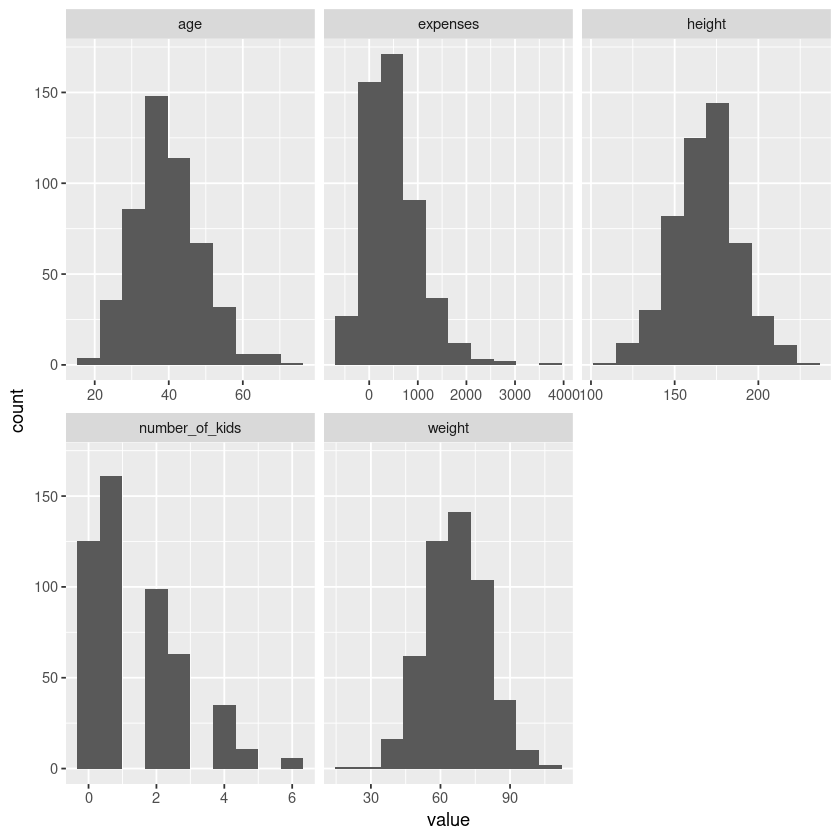

In [9]:
# Variables distributions, for having a complete insight into our data.

# https://stackoverflow.com/a/35373419
ggplot(gather(df[quantitive]), aes(value)) + 
    geom_histogram(bins = 10) + 
    facet_wrap(~key, scales = 'free_x')

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


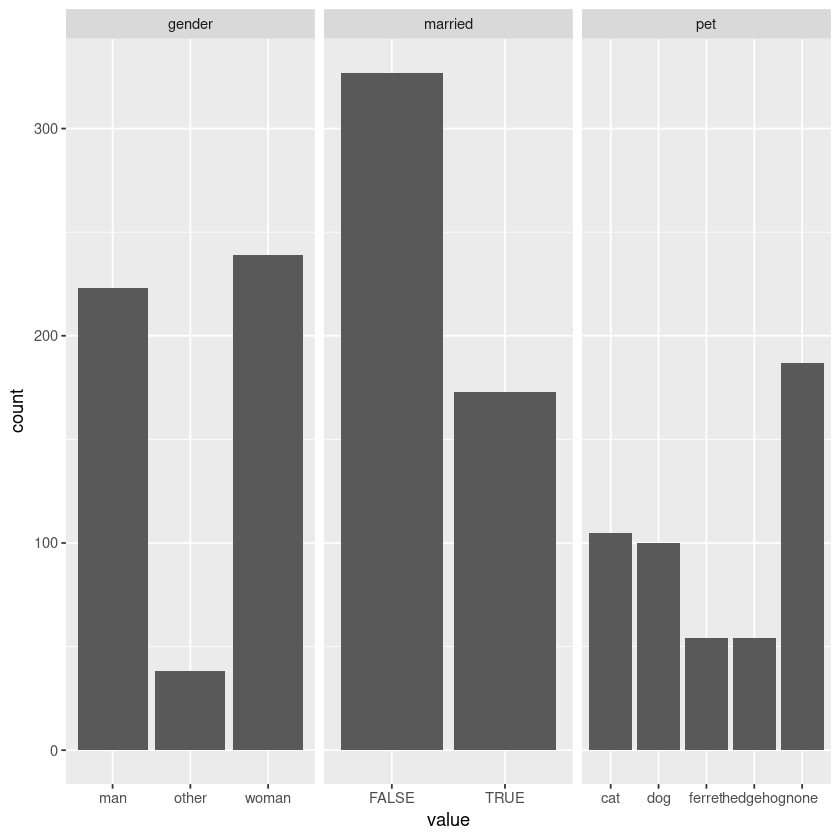

In [10]:
# barplots for categorical variables.
ggplot(gather(df[categorical]), aes(value)) + 
    geom_histogram(bins = 10, stat="count") + 
    facet_wrap(~key, scales = 'free_x')

At first glance distribution of _age_, _height_ and _weight_ seems to be disdtributed normally, while distribution of _number of kids_ and _expenses_ is similar to Gamma.

Let's look at boxplot and qqplot of _age_ variable.

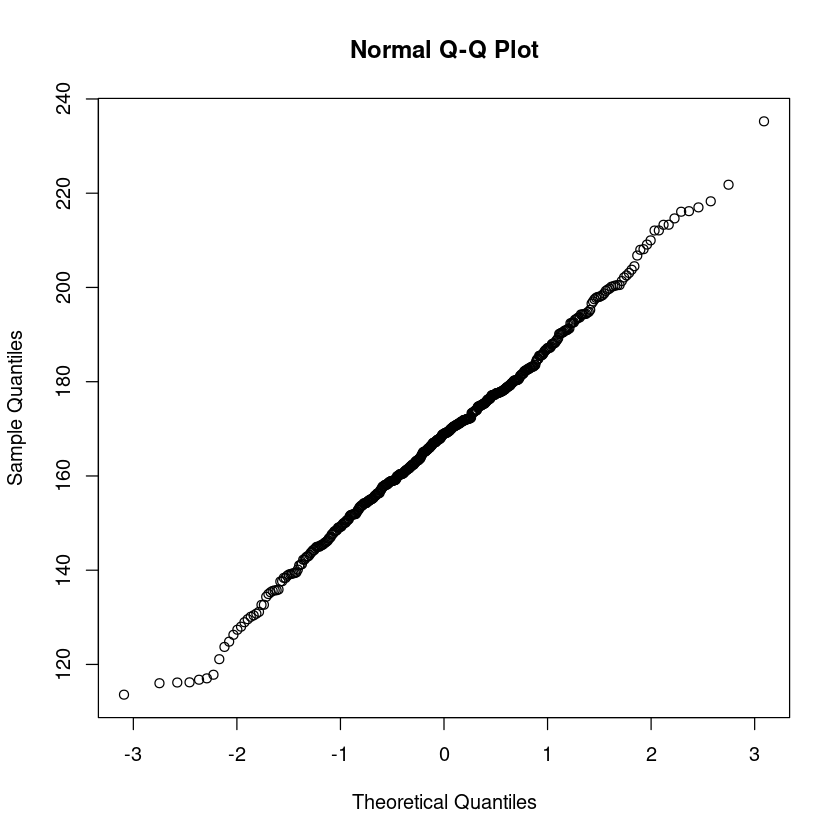

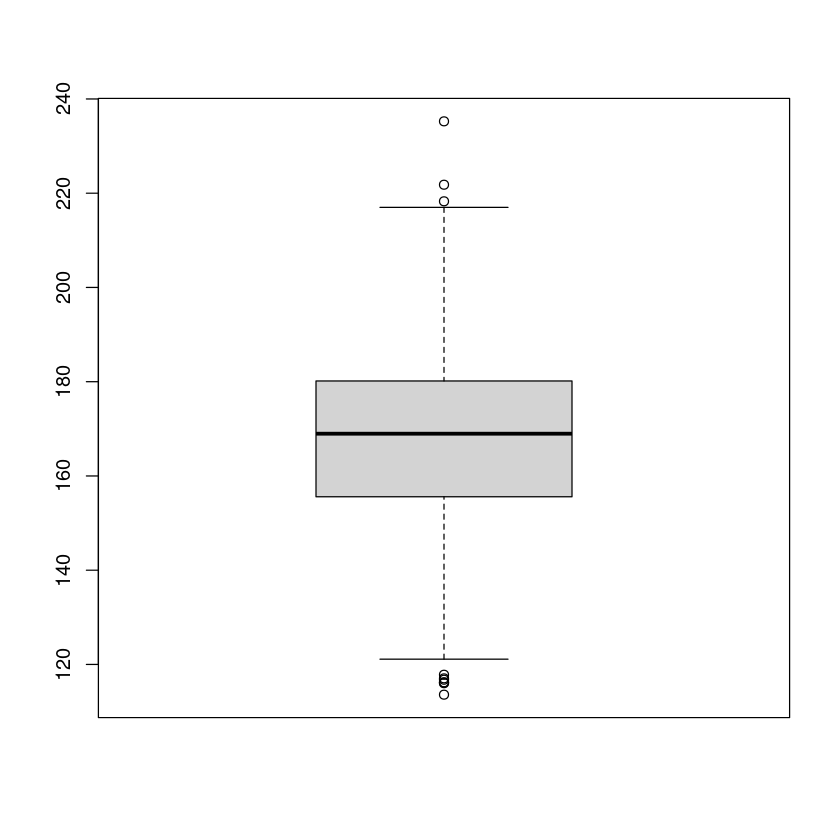

In [11]:
qqnorm(df$height)
boxplot(df$height)
# library("ggplot2")
# ggplot(df, aes(y=df$height, x=order(df$height)) ) +
# stat_summary(fun=mean, geom="point", shape=20, size=14, color="red", fill="red")

# create data
# names=c(rep("A", 20) , rep("B", 8) , rep("C", 30), rep("D", 80))
# value=c( sample(2:5, 20 , replace=T) , sample(4:10, 8 , replace=T), sample(1:7, 30 , replace=T), sample(3:8, 80 , replace=T) )
# data=data.frame(names,value)
 
# # plot
# ggplot(data, aes(x=names, y=value, fill=names)) +
#     geom_boxplot(alpha=0.7) +
#     stat_summary(fun.y=mean, geom="point", shape=20, size=14, color="red", fill="red") +
#     theme(legend.position="none") +
#     scale_fill_brewer(palette="Set1")


Warning message in fun(libname, pkgname):
“cannot find zip program c:/progra~1/7-zip/7z.exe; see ?nm.unzip”


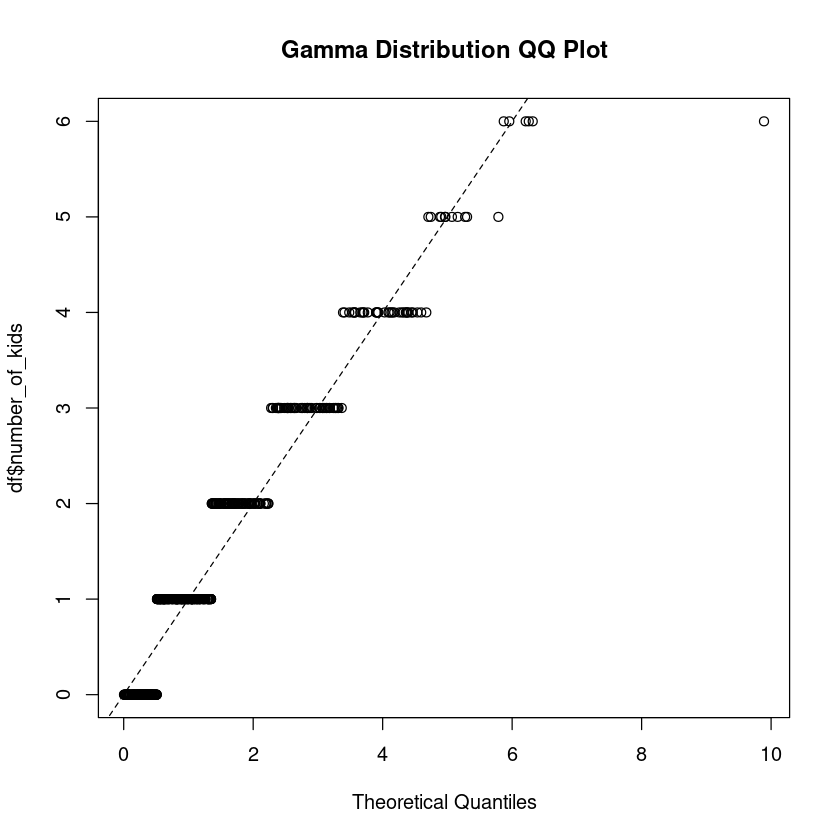

In [12]:
# install.packages("devtools")
# devtools::install_github("qPharmetra/qpToolkit")
library("qpToolkit")
qqGamma(df$number_of_kids)

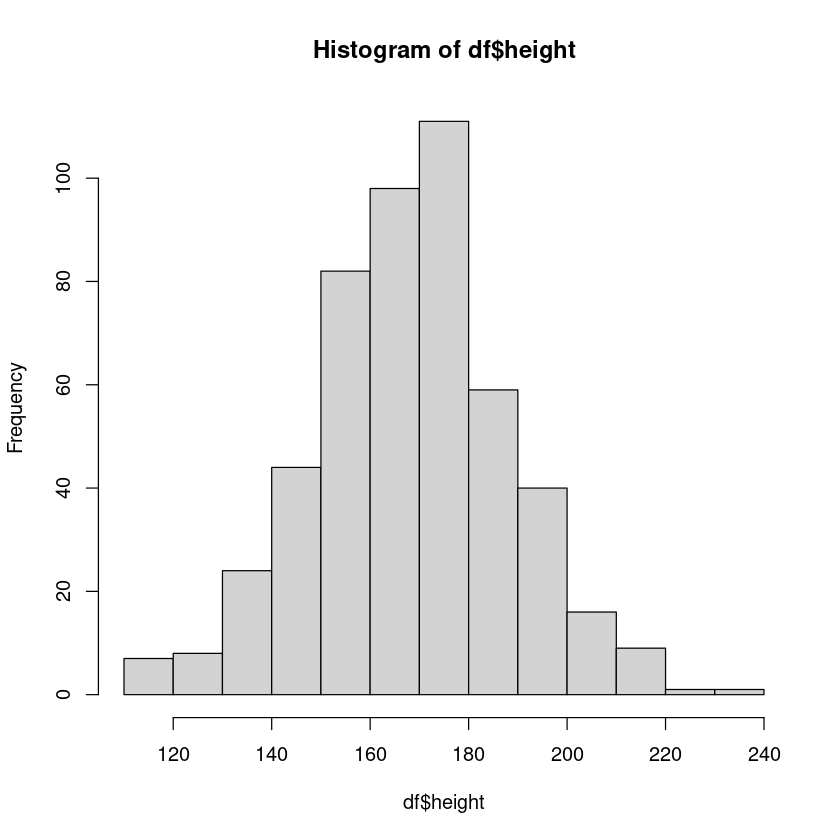

In [13]:
hist(df$height)

In [14]:
# Calculate p-values for thesis about E(df$height) = 170, Med(df$height) = 165

#
### Assumptions:
#
# X ~ Norm(u, sig)
# u, sig - unknown

X = df$height
N = length(X)

# H1: u0 < 170
u0 = 170

est_val = (mean(X) - u0) * sqrt((N - 1) * N) / sqrt(sum((X - mean(X)) ** 2))

p = function(x) {print(glue(x, .envir=environment()))}

reject_h0 = function(est_val, threshold) {
    pvalue = -qt(1-threshold, df=N-1)

    print(glue("est_val: {est_val}", .envir=environment()))
    print(glue("pvalue: {pvalue}", .envir=environment()))
    est_val <= pvalue
}

reject_h0(est_val, threshold=0.05)

est_val: -2.06991740470351
pvalue: -1.64791298405971


[1] TRUE

For mean value estimation I used t-Student test, under assumption that we sample from normal distribution. Was that assumption reasonable in terms of our data? 
I suppose that indeed _df$height_ samples come from normal distribution. Ealier we have seen _qqplot_ and _boxplot_, that showed significant similarity to normal disitribution.

In [15]:
t.test(X, alternative="less", mu=170)


	One Sample t-test

data:  X
t = -2.0699, df = 499, p-value = 0.01949
alternative hypothesis: true mean is less than 170
95 percent confidence interval:
    -Inf 169.629
sample estimates:
mean of x 
 168.1804 


In [16]:
wilcox.test(X, alternative="less", mu=165)


	Wilcoxon signed rank test with continuity correction

data:  X
V = 74416, p-value = 0.9999
alternative hypothesis: true location is less than 165


In [17]:
# Two-sided confidence intervals with alpha=0.01 for 'age' variable:
# a) Mean and standard deviation
# b) quantiles 1/4, 1/2, 3/4

X = df$age
N = length(X)
alpha = 1 - 0.99
S2 = 1/N * sum((X - mean(X))**2)

# Mean
mleft  = mean(X) - qt(1-alpha/2, df=N-1) * sqrt(S2) / sqrt(N - 1)
mright = mean(X) + qt(1-alpha/2, df=N-1) * sqrt(S2) / sqrt(N - 1)

p("Confidence interval for mean     (with alpha={alpha}) is ({round(mleft, 3)}, {round(mright, 3)})")

# Standard dev.
sdleft  = sqrt(N * S2 / qchisq(1-alpha/2, df=N-1))
sdright = sqrt(N * S2 / qchisq(alpha/2,   df=N-1))

p("Confidence interval for st. dev. (with alpha={alpha}) is ({round(sdleft, 3)}, {round(sdright, 3)})\n\n")

mean = mean(c(mleft, mright))
sd   = mean(c(sdleft, sdright))

# Quantiles
q = function(p) {round(qnorm(p, mean=mean, sd=sd), 3)}

for (quartile in c(1/4, 1/2, 3/4)) {
  p("{quartile} quantile: {q(quartile)}")
}

Confidence interval for mean     (with alpha=0.01) is (38.446, 40.522)
Confidence interval for st. dev. (with alpha=0.01) is (8.297, 9.768)

0.25 quantile: 33.392
0.5 quantile: 39.484
0.75 quantile: 45.576


The above results were obtained under assumption, that _age_ variable was sampled from normally distributed variable.

In [18]:
# Przetestuj na poziomie istotności 0.01 trzy hipotezy istotności:
# 1.różnicy między średnią wartością wybranej zmiennej dla kobiet i dla mężczyzn;
# 2.zależności między dwiema zmiennymi ilościowymi;
# 3.zależności między dwiema zmiennymi jakościowymi.


In [94]:
square = function(x) x**2
rss_gen = function(fm) {fm %>% residuals %>% square %>% sum}
tss_gen = function(fm) {(df$expenses - mean(df$expenses)) %>% square %>% sum}
r2_gen  = function(rss, tss) {1 - rss/tss}
p = function(x) {print(glue(x, .envir=environment()))}

print_lm_summary = function(rss, tss, r2) {
    p = function(x) {print(glue(x, .envir=environment()))}
    p("RSS: {rss}")
    p("TSS: {tss}")
    p("R2: {r2}")
}

lm_summary = function(fm) {
    rss = rss_gen(fm)
    tss = tss_gen(fm)
    r2 = r2_gen(rss, tss)

    print_lm_summary(rss, tss, r2)
}


# Performs linear regression of 'expenses' over all another columns.
# Returns fit object.
perform_regression = function(df, model_name) {
    print(paste("== Results of linear regression for model\"", model_name, "\":"))
    fm <- lm(expenses~., df)
    lm_summary(fm)
    print(summary(fm))
    fm
}

In [82]:
full_fit <- perform_regression(df, "All variables model")

[1] "== Results of linear regression for model\" All variables model \":"
RSS: 22376886.2288278
TSS: 160686928.927564
R2: 0.860742336802547

Call:
lm(formula = expenses ~ ., data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-763.73 -130.38    1.13  128.74  905.56 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -2254.3121    97.4196 -23.140  < 2e-16 ***
age               57.5565     1.0696  53.809  < 2e-16 ***
weight             1.1786     0.9970   1.182  0.23771    
height             2.0535     0.6573   3.124  0.00189 ** 
genderother       45.5034    37.6613   1.208  0.22754    
genderwoman      -20.9474    20.1065  -1.042  0.29801    
marriedTRUE      -12.2409    25.8112  -0.474  0.63554    
number_of_kids   -11.9717     8.8257  -1.356  0.17558    
ferret           388.4530    31.3005  12.410  < 2e-16 ***
hedgehog         224.3951    31.1408   7.206 2.19e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



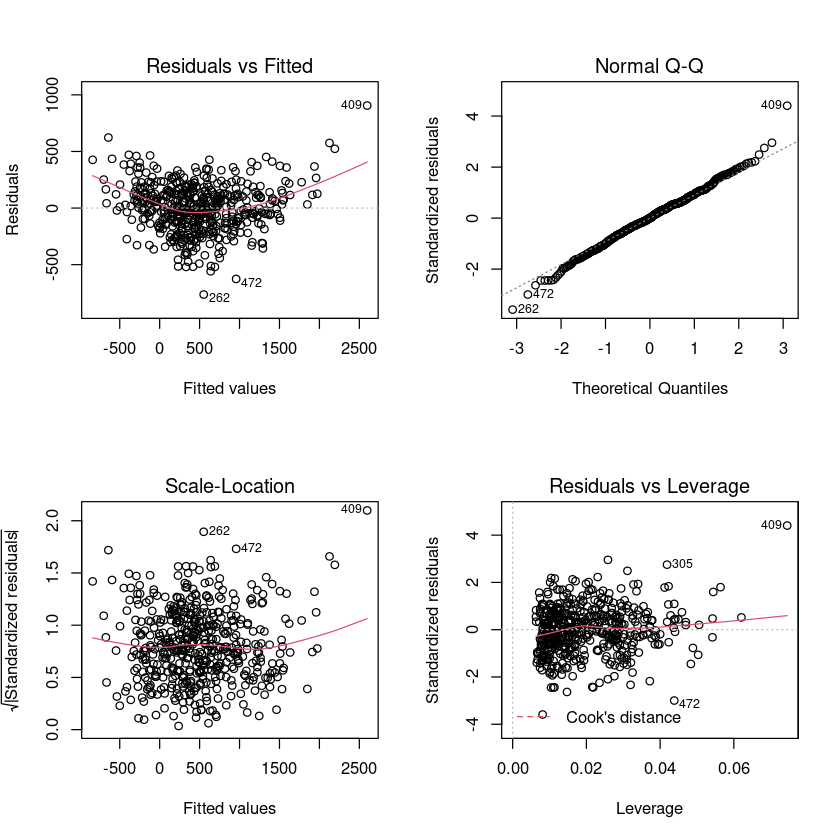

In [92]:
par(mfrow=c(2,2))
plot(full_fit)

In [98]:
head(df[-"expenses",])

ERROR: Error in -"expenses": invalid argument to unary operator


In [99]:
full_data = function() {
    DATA_FNAME = "people.tsv"
    df <- read.table(DATA_FNAME, header = TRUE,  sep = '\t',  stringsAsFactors = FALSE)
    df
}

hat = function(df) {
    stats::hat(df[,-which(names(df) == "expenses")])
}

gen_best_model = function() {
    DATA_FNAME = "people.tsv"
    df <- read.table(DATA_FNAME, header = TRUE,  sep = '\t',  stringsAsFactors = FALSE)
    
    # Handle pets (only 'ferret' and 'hedgehog' matter significantly)
    ferret_incides   = which(df$pet == "ferret")
    hedgehog_indices = which(df$pet == "hedgehog")
    df <- cbind(df, ferret=0, hedgehog=0)
    df$ferret[ferret_incides] = 1
    df$hedgehog[hedgehog_indices] = 1
    df <- df[, -which(names(df) == "pet")]
    
    # 'weight' is highly correlated with height so drop it; 'gender' and 'married' are not significant.
    df <- df[ , -which(names(df) %in% c("married", "weight", "gender"))]
    
    # diagnosis plots showed non-linear dependency in data, try using squared 'age'.
    df <- cbind(df, df$age**2) 

    df
}

best_fit <- perform_regression(gen_best_model(), "Best model")

[1] "== Results of linear regression for model\" Best model \":"
RSS: 18557405.0781514
TSS: 160686928.927564
R2: 0.884512043375246

Call:
lm(formula = expenses ~ ., data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-682.62 -123.93   -2.94  140.61  489.60 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -978.13190  151.82829  -6.442 2.80e-10 ***
age              -5.27363    6.11688  -0.862    0.389    
height            2.31543    0.44467   5.207 2.82e-07 ***
number_of_kids  -11.61687    6.28123  -1.849    0.065 .  
ferret          391.95396   28.32523  13.838  < 2e-16 ***
hedgehog        220.68328   28.19417   7.827 3.07e-14 ***
`df$age^2`        0.74874    0.07207  10.389  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 194 on 493 degrees of freedom
Multiple R-squared:  0.8845,	Adjusted R-squared:  0.8831 
F-statistic: 629.3 on 6 and 493 DF,  p-value: < 2.2e-16



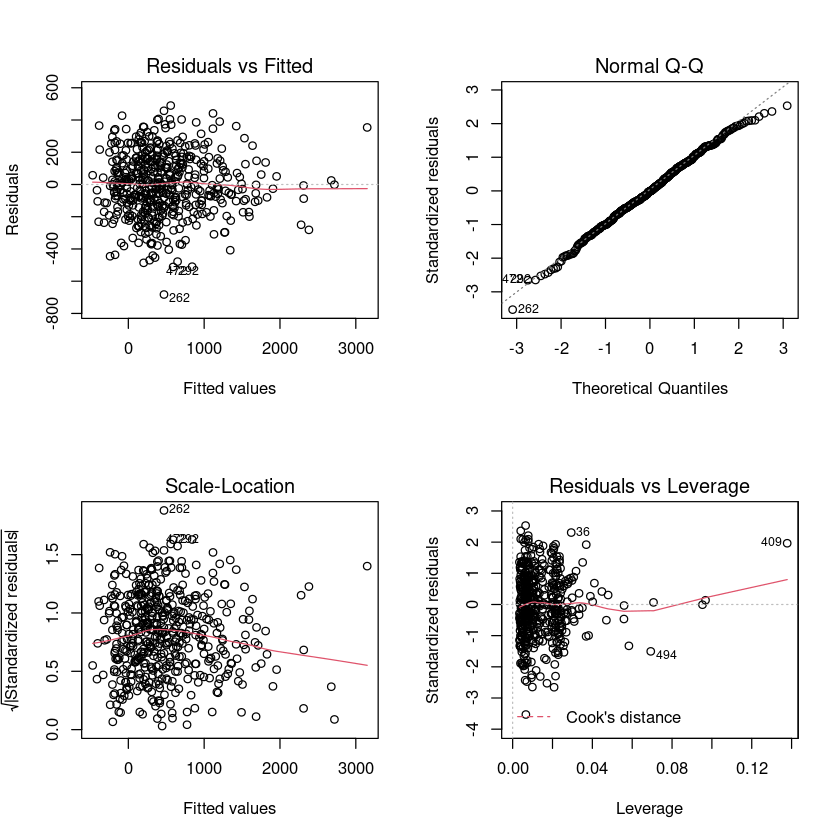

In [93]:
par(mfrow=c(2,2))
plot(best_fit)

In [196]:
leverage = hatvalues(best_fit)
threshold = 2 * sum(leverage) / length(leverage)
leverage[leverage > threshold]

1         19         32         36         43         44         58 
0.04016970 0.05585101 0.03686571 0.02939768 0.04792014 0.09527864 0.02805296 
        79         94        131        134        162        188        199 
0.02959888 0.05834628 0.03065575 0.02979301 0.03811864 0.03693527 0.04102542 
       212        230        247        267        268        295        296 
0.02991322 0.03333511 0.03180669 0.03091128 0.03900304 0.03514050 0.07069835 
       305        307        317        356        391        409        438 
0.09679978 0.02907383 0.03501231 0.04704534 0.03058272 0.13778918 0.03335577 
       440        447        452        460        494 
0.03332772 0.02986763 0.04478603 0.05592161 0.06931049

In [215]:
best_fit_full_row <- perform_regression(gen_best_model(), "Best model without outliers")

M = model.matrix(best_fit_full_row)
N = dim(M)[1]
P = dim(M)[2]

sig = sigma(best_fit_full_row)
leverage = hatvalues(best_fit_full_row)

se = residuals(fm) / (sig * sqrt(1 - leverage))
which(se > 3)
# remove some outliers rows.
df_no_outliers <- gen_best_model()
df_no_outliers <- df_no_outliers[-which(se > 3),]
best_fit_no_outliers <- perform_regression(df_no_outliers, "Best model without outliers")

[1] "== Results of linear regression for model\" Best model without outliers \":"
RSS: 18557405.0781514
TSS: 151273674.376297
R2: 0.877325614290366

Call:
lm(formula = expenses ~ ., data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-682.62 -123.93   -2.94  140.61  489.60 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -978.13190  151.82829  -6.442 2.80e-10 ***
age              -5.27363    6.11688  -0.862    0.389    
height            2.31543    0.44467   5.207 2.82e-07 ***
number_of_kids  -11.61687    6.28123  -1.849    0.065 .  
ferret          391.95396   28.32523  13.838  < 2e-16 ***
hedgehog        220.68328   28.19417   7.827 3.07e-14 ***
`df$age^2`        0.74874    0.07207  10.389  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 194 on 493 degrees of freedom
Multiple R-squared:  0.8845,	Adjusted R-squared:  0.8831 
F-statistic: 629.3 on 6 and 493 DF,  p-value: < 2.2e-

188 409 
188 409

[1] "== Results of linear regression for model\" Best model without outliers \":"
RSS: 18267309.9812827
TSS: 151273674.376297
R2: 0.879243298236794

Call:
lm(formula = expenses ~ ., data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-688.96 -124.90   -2.06  135.56  488.01 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -1.072e+03  1.550e+02  -6.921 1.41e-11 ***
age            -9.881e-02  6.390e+00  -0.015   0.9877    
height          2.292e+00  4.422e-01   5.184 3.18e-07 ***
number_of_kids -1.304e+01  6.288e+00  -2.074   0.0386 *  
ferret          3.921e+02  2.816e+01  13.923  < 2e-16 ***
hedgehog        2.139e+02  2.830e+01   7.558 2.02e-13 ***
`df$age^2`      6.848e-01  7.586e-02   9.028  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 192.9 on 491 degrees of freedom
Multiple R-squared:  0.8792,	Adjusted R-squared:  0.8778 
F-statistic: 595.8 on 6 and 491 DF,  p-value: < 2.2

Unfortunately, removing 2 outliers (188, 409) decreased our R^2 metric. 

Let's try also removing observations with both high leverage and high residual.

In [216]:

df_leverage <- gen_best_model()
df_leverage <- df_leverage[-c(409, 494, 36),]
best_fit_leverage <- perform_regression(df_leverage, "Best model without outliers")
# par(mfrow=c(2,2))
# plot(best_fit_leverage)

[1] "== Results of linear regression for model\" Best model without outliers \":"
RSS: 18137820.8788501
TSS: 151273674.376297
R2: 0.880099290549843

Call:
lm(formula = expenses ~ ., data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-681.57 -124.06   -0.34  138.28  487.11 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -984.31318  155.51916  -6.329 5.57e-10 ***
age              -3.99309    6.45331  -0.619    0.536    
height            2.22067    0.44245   5.019 7.28e-07 ***
number_of_kids  -10.15204    6.26045  -1.622    0.106    
ferret          390.86168   28.09094  13.914  < 2e-16 ***
hedgehog        204.09482   28.47386   7.168 2.82e-12 ***
`df$age^2`        0.73044    0.07712   9.471  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 192.4 on 490 degrees of freedom
Multiple R-squared:  0.8772,	Adjusted R-squared:  0.8757 
F-statistic: 583.3 on 6 and 490 DF,  p-value: < 2.2

Removing high-error-and-leverage observations also hadn't improved accuracy. 